<a href="https://colab.research.google.com/github/albert-h-wong/DS-Sprint-01-Dealing-With-Data/blob/master/Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

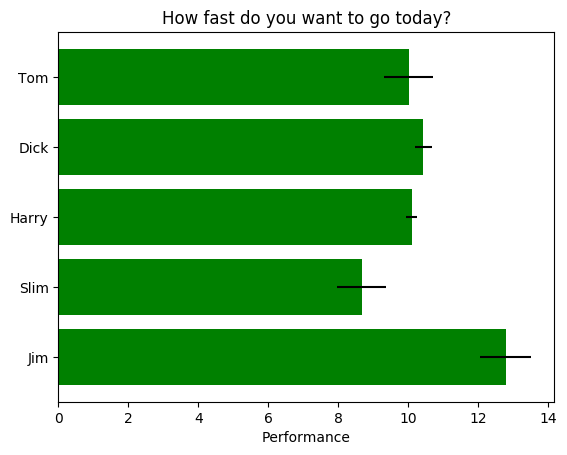

In [53]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

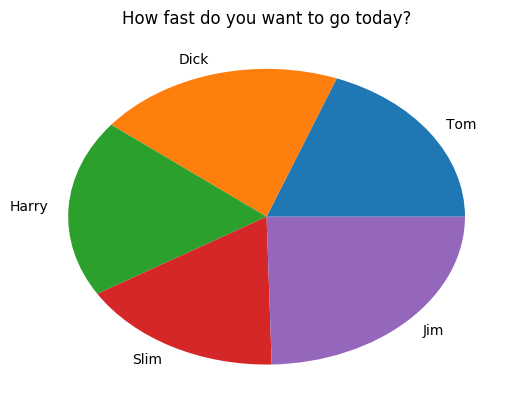

In [54]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


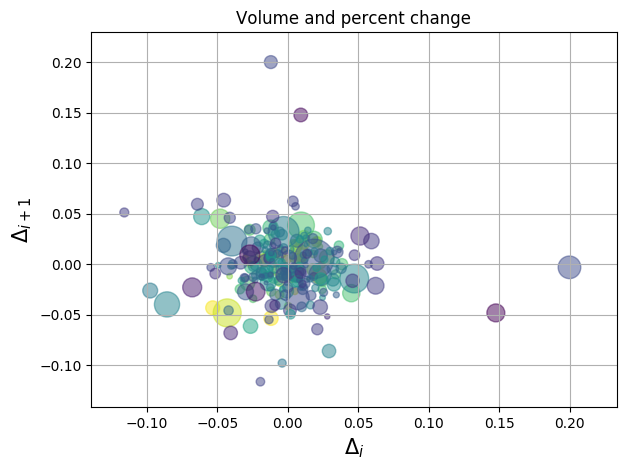

In [55]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

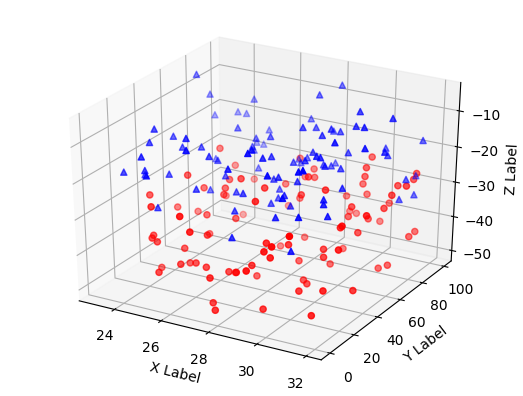

In [56]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## **DS Sprint 1 Day 3 Plotting Assignment**

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
#Code for loading and cleaning dataset from previous assignment
auto_mpg_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

!curl https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
  
import pandas as pd

auto_mpg_data = pd.read_csv(auto_mpg_data_url,delim_whitespace = True, header=None)
auto_mpg_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model_year', 'origin','car_name']
auto_mpg_data.replace('?', np.nan, inplace=True)
horsepower_edit = pd.to_numeric(auto_mpg_data.horsepower)
median_hp = auto_mpg_data.horsepower.median()
auto_mpg_data.horsepower = auto_mpg_data.horsepower.fillna(median_hp)
auto_mpg_data = auto_mpg_data.assign(hp_revised=horsepower_edit)




18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"
15.0   8   383.0      170.0      3563.      10.0   70  1	"dodge challenger se"
14.0   8   340.0      160.0      3609.       8.0   70  1	"plymouth 'cuda 340"
15.0   8   400.0      150.0      3761.       9.5   70  1	"chevrolet monte ca

In [59]:
print(auto_mpg_data.describe())
print(auto_mpg_data.head(40))

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model_year      origin  hp_revised  
count  398.000000  398.000000  392.000000  
mean    76.010050    1.572864  104.469388  
std      3.697627    0.802055   38.491160  
min     70.000000    1.000000   46.000000  
25%     73.000000    1.000000   75.000000  
50%     76.000000    1.000000   93.500000  
75%     79.000000    2.00

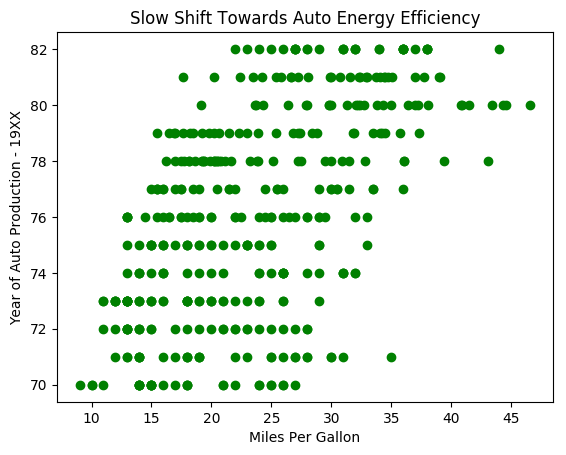

In [64]:
#Basic Scatter Plot of Two Variables

plt.scatter(auto_mpg_data['mpg'], auto_mpg_data['model_year'], color='green')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Year of Auto Production - 19XX')
plt.title("Slow Shift Towards Auto Energy Efficiency")
plt.show()

The scatter plot above provides a straw man proxy for a time series analysis of the auto industry's manufacturing as measured by fuel efficiency. The dataset tested nearly 400 vehicles between the year 1970-1982. Additional regression analysis is needed to provide a more precise assessment of the trend but you can see that there was a slow but directional trend by auto manufacturers to produce automobiles that can drive more miles per gallon. On both sides of the tail, you can see a general increase year over year to produce more options for fuel efficiency and fewer of the most fuel inefficient vehicles. 

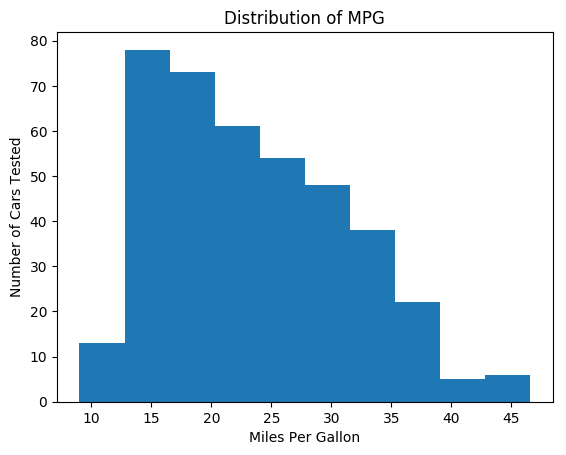

In [65]:
#Basic histogram to show the distribution of Auto MPG

from matplotlib.pyplot import hist
plt.hist(auto_mpg_data.mpg)
plt.xlabel('Miles Per Gallon')
plt.ylabel('Number of Cars Tested')
plt.title("Distribution of MPG")
plt.show()

The next chart is a histogram that illustrates the distribution of fuel efficiency amongst the 398 cars that were measured in the study. As the previous chart noted, there was a slow shift over time to improve energy efficiency but the greater number of vehicles produced during the 12 year span still skewed towards the more inefficient side of the spectrum. With a differing rate of change happening over time, which is not factored into this chart, we could have mistakenly inferred that manufacturers are still mainly targeting vehicles in the 15-20 MPG range in the next decade, by assuming a static run rate of production. Instead this chart is only helpful to present the distribution of vehicles on a historical cumulative basis during that specified time period.

In [62]:
auto_mpg_data['hp_revised'].mean()

104.46938775510205

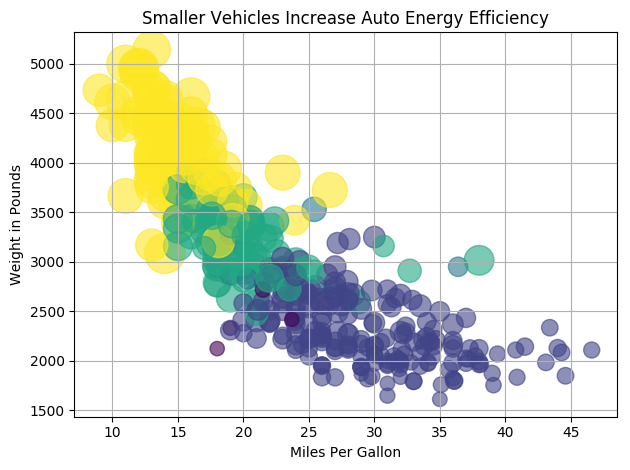

In [63]:
# Detailed scatter plot that can illustrate additional variables

#Marker size needs to be scaled up in order to see the comparison of the variable
marker = auto_mpg_data.displacement**1.1
color = auto_mpg_data.cylinders

fig, ax = plt.subplots()
ax.scatter(auto_mpg_data.mpg, auto_mpg_data.weight, c=color, s=marker, alpha=0.6)

ax.set_xlabel('Miles Per Gallon')
ax.set_ylabel('Weight in Pounds')
ax.set_title('Smaller Vehicles Increase Auto Energy Efficiency')

ax.grid(True)
fig.tight_layout()

plt.show()

The dataset from the study provided a number of continuous variables and some discrete variables that could be helpful in understanding vehicle attributes and its impact on fuel efficiency. In general most vehicles' fuel performance can largely be attributed to the size of the vehicle. The heavier a vehicle, the higher likelihood that the vehicle would have larger engine displacement, more cylinders to power the car, and generate more horsepower. On the other end, fuel efficient cars tend to be lighter, have less swept volume in engine displacement, and fewer cylinders to power a slower accelerating car. By illustrating a scatter plot by weight and miles per gallon, it would be clear to an audience that size has a major impact on fuel efficiency. To further segment the data and provide additional context with the available test measurements, I chose a discrete variable of cylinders (3,4,5,6,8) to be depicted by marker color to show how the powertrain of a vehicle is closely tied to the size of the vehicle. Lastly engine displacement is an instrumental measurement commonly used for fuel efficiency by regulators for tax assessment. As with the cylinders, the higher the volume of engine displacement is closely correlated with larger vehicles that generate the higher volume in order to perform at its intended higher horsepower. The marker size increases at a scaled up rate according to the engine displacement data to show the difference for vehicle size and the impact to miles per gallon. Upon further segmentation, on a smaller sample performance measurement, the audience may use the chart to see changes in technology and engineering that produced vehicles with improved relative fuel efficiency while also maintaining relative power performance. 
The first two charts were very basic so it was not challenging to produce. It did take time to think through the variables and decide which ones were more interesting to paint an appropriate picture of insight. The last chart took longer to figure out how to appropriately code the sizing and color of the markers and a noticeable but fitting scale factor to size it up.